<a href="https://colab.research.google.com/github/AlirezaSamari/DeepLearning-Pytorch-fastai-/blob/main/05_Simple_SGD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from fastai.vision.all import *
import torch
from fastcore import *

In [2]:
def Y(x): return (1.5*torch.randn(40) +2*(x-1)**2 + 1)

In [3]:
x = torch.linspace(-4, 4, 40)
y = Y(x)

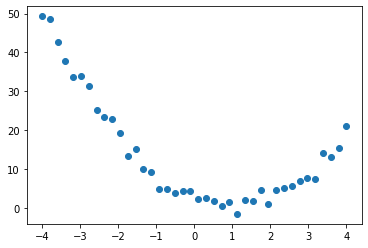

In [4]:
import matplotlib.pyplot as plt
plt.scatter(x, y)

In [5]:
def f(t, params):
  a, b, c= params
  return a*t**2 + b*t + c


In [6]:
params = torch.randn(3).requires_grad_()
params

tensor([0.2992, 0.8346, 1.7551], requires_grad=True)

In [7]:
y_hat = f(x, params)

In [8]:
def mse(y_hat, y): return ((y_hat - y)**2).mean()

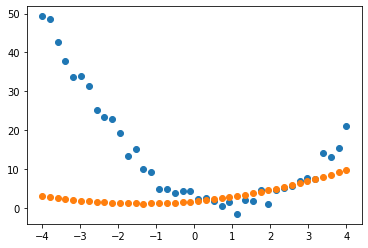

In [9]:
plt.scatter(x, y)
yhat = y_hat.detach().numpy()
plt.scatter(x, yhat)

In [10]:
loss = mse(y_hat, y)

In [11]:
def update(params, lr = 1e-2):
  y_hat=f(x, params)
  loss = mse(y_hat, y)
  loss.backward()
  params.data -= params.grad.data * lr
  params.grad = None

In [12]:
for i in range(20): update(params)

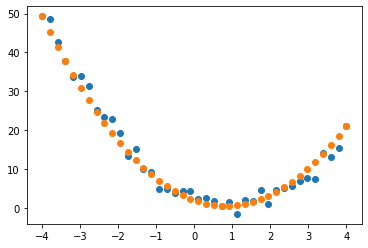

In [13]:
plt.scatter(x, y)
plt.scatter(x, f(x, params).detach())